## Feature Engineering: Outlier, Z-Score, Standard Deviation.

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height1.csv")
df.sample(5)

,gender,height
1280,Male,73.438772
4580,Male,69.347617
3563,Male,71.671255
4150,Male,68.042206
8661,Female,66.060124


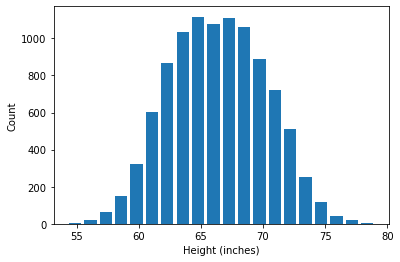

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

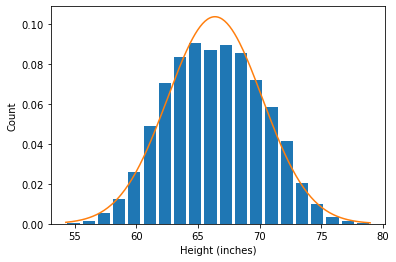

In [4]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [5]:
df.height.mean()

66.3675597548656

In [6]:
df.height.std()

3.847528120795573

## Outlier detection and removal using 3 standard deviation

- One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. 
- Which means we can come up with following upper and lower bounds.

In [7]:
upper_limit = df.height.mean() + 3 * df.height.std()
upper_limit

77.91014411725232

In [8]:
lower_limit = df.height.mean() -3 * df.height.std()
lower_limit

54.824975392478876

In [9]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


- Above the heights on higher end is 78 inch which is around 6 ft 6 inch. 
- Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you         remove those data points. 
- Similarly on lower end it is 54 inch which is around 4 ft 6 inch. 
- While this is also a legitimate height you don't find many people having this height so it is safe to consider both of     these cases as outliers

## Remove these outliers and generate new dataframe

In [10]:
df_no_outlier_std_dev = df[(df.height < upper_limit) & (df.height > lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [11]:
df_no_outlier_std_dev.shape

(9993, 2)

In [12]:
df.shape

(10000, 2)

- Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

## Outlier detection and removal using Z Score

- Z score indicates how many standard deviation away a data point is.

- For example in our case mean is 66.37 and standard deviation is 3.84.

- If a value of a data point is 77.91 then Z score for that is 3 

- because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

**z = X – μ / σ**
- where
- X is a single raw data value
- μ is the population mean
- σ is the population standard deviation

In [13]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [14]:
#Above for first record with height 73.84, z score is 1.94. 
#This means 73.84 is 1.94 standard deviation away from mean

(73.84-66.37) / 3.84

1.9453124999999998

- Get data points that has z score higher than 3 or lower than -3. 
- Another way of saying same thing is get data points that are more than 3 standard deviation away

In [15]:
df[df['zscore'] > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [16]:
df[df['zscore'] < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [17]:
df[(df.zscore < -3) | (df.zscore > 3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


## Remove the outliers and produce new dataframe

In [18]:
df_no_outliers = df[(df.zscore > -3) & (df.zscore < 3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [19]:
df_no_outliers.shape

(9993, 3)

In [20]:
df.shape

(10000, 3)